<a href="https://colab.research.google.com/github/moaaz12-web/IMAGIC-/blob/main/Imagic%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Requirements

In [ ]:
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/imagic/train_imagic.py
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate==0.12.0 transformers ftfy bitsandbytes gradio

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163 kB 13.6 MB/s 
     |████████████████████████████████| 18.7 MB 709 kB/s 
     |████████████████████████████████| 143 kB 15.3 MB/s 
     |████████████████████████████████| 5.5 MB 61.8 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 62.5 MB 1.1 MB/s 
     |████████████████████████████████| 11.6 MB 54.8 MB/s 
     |████████████████████████████████| 7.6 MB 48.0 MB/s 
     |████████████████████████████████| 106 kB 72.9 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 2.3 MB 49.8 MB/s 
     |████████████████████████████████| 213 kB 64.4 MB/s 
     |████████████████████████████████| 272 kB 72.1 MB/s 
     |█████

In [ ]:
#@title Login to HuggingFace 🤗

#@markdown You need to accept the model license before downloading or using the Stable Diffusion weights. Please, visit the [model card](https://huggingface.co/CompVis/stable-diffusion-v1-4), read the license and tick the checkbox if you agree. You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work.
from huggingface_hub import notebook_login
!git config --global credential.helper store
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


### Install xformers from precompiled wheel.

In [ ]:
%pip install -q https://github.com/metrolobo/xformers_wheels/releases/download/1d31a3ac_various_6/xformers-0.0.14.dev0-cp37-cp37m-linux_x86_64.whl
# These were compiled on Tesla T4, should also work on P100, thanks to https://github.com/metrolobo

# If precompiled wheels don't work, install it with the following command. It will take around 40 minutes to compile.
# %pip install git+https://github.com/facebookresearch/xformers@1d31a3a#egg=xformers

     |████████████████████████████████| 102.9 MB 93 kB/s 


In [ ]:
OUTPUT_DIR = "stable_diffusion_weights/imagic" #@param {type:"string"}


## Settings and run

# HERE U CAN SPECIFY THE TEXT PROMPT FOR EDITING

In [ ]:
#@markdown Name/Path of the initial model.
MODEL_NAME = "CompVis/stable-diffusion-v1-4" #@param {type:"string"}

#@markdown Target Text.
TARGET_TEXT = "A guy with his hands up in the air." #@param {type:"string"}

#@markdown If model weights should be saved directly in google drive (takes around 4-5 GB).
save_to_gdrive = False #@param {type:"boolean"}
if save_to_gdrive:
    from google.colab import drive
    drive.mount('/content/drive')

#@markdown Enter the directory name to save model at.
OUTPUT_DIR = "stable_diffusion_weights/imagic" #@param {type:"string"}
if save_to_gdrive:
    OUTPUT_DIR = "/content/drive/MyDrive/" + OUTPUT_DIR
else:
    OUTPUT_DIR = "/content/" + OUTPUT_DIR

print(f"[*] Weights will be saved at {OUTPUT_DIR}")
!mkdir -p $OUTPUT_DIR

[*] Weights will be saved at /content/stable_diffusion_weights/imagic


# HERE YOU UPLOAD YOUR DESIRED INPUT IMAGE

In [ ]:
#@markdown Upload your 1 image by running this cell.

import os
from google.colab import files
import shutil

uploaded = files.upload()
for filename in uploaded.keys():
    INPUT_IMAGE = os.path.join(OUTPUT_DIR, filename)
    shutil.move(filename, INPUT_IMAGE)

Saving pic.png to pic.png


# Start Training

Add `--gradient_checkpointing` flag to reduce VRAM usage.

remove `--use_8bit_adam` flag for full precision, uses more VRAM

In [ ]:
!accelerate launch train_imagic.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --output_dir=$OUTPUT_DIR \
  --input_image=$INPUT_IMAGE \
  --target_text="{TARGET_TEXT}" \
  --seed=3434554 \
  --resolution=512 \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --emb_learning_rate=1e-3 \
  --learning_rate=1e-6 \
  --emb_train_steps=500 \
  --max_train_steps=1000


The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--num_cpu_threads_per_process` was set to `1` to improve out-of-box performance
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
Downloading: 100% 1.06M/1.06M [00:00<00:00, 2.07MB/s]
Downloading: 100% 525k/525k [00:00<00:00, 1.23MB/s]
Downloading: 100% 472/472 [00:00<00:00, 395kB/s]
Downloading: 100% 806/806 [00:00<00:00, 724kB/s]
Downloading: 100% 592/592 [00:00<00:00, 384kB/s]
Downloading: 100% 492M/492M [00:08<00:00, 59.5MB/s]
Downloading: 100% 335M/335M [00:05<00:00, 66.2MB/s]
Downloading: 100% 522/522 [00:00<00:00, 471kB/s]
Downloading: 100% 3.44G/3.44G [01:04<00:00, 53.2MB/s]
Downloading: 100% 743/743 [00:00<00:00, 657kB/s]
Optimizing embedding: 100% 500/500 [05:23<00:00,  1.54it/s, loss=0.0832]
Fi

## Convert weights to ckpt to use in web UIs like AUTOMATIC1111.

In [ ]:
#@markdown Download script
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py

In [ ]:
#@markdown Run conversion.
ckpt_path = OUTPUT_DIR + "/model.ckpt"

half_arg = ""
#@markdown  Whether to convert to fp16, takes half the space (2GB), might loose some quality.
fp16 = False #@param {type: "boolean"}
if fp16:
    half_arg = "--half"
!python convert_diffusers_to_original_stable_diffusion.py --model_path $OUTPUT_DIR  --checkpoint_path $ckpt_path $half_arg
print(f"[*] Converted ckpt saved at {ckpt_path}")

Reshaping encoder.mid.attn_1.q.weight for SD format
Reshaping encoder.mid.attn_1.k.weight for SD format
Reshaping encoder.mid.attn_1.v.weight for SD format
Reshaping encoder.mid.attn_1.proj_out.weight for SD format
Reshaping decoder.mid.attn_1.q.weight for SD format
Reshaping decoder.mid.attn_1.k.weight for SD format
Reshaping decoder.mid.attn_1.v.weight for SD format
Reshaping decoder.mid.attn_1.proj_out.weight for SD format
[*] Converted ckpt saved at /content/stable_diffusion_weights/imagic/model.ckpt


## Inference

In [ ]:
import os
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

# If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive

model_path = OUTPUT_DIR

# model_path = "lambdalabs/stable-diffusion-image-variations"   

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
pipe = StableDiffusionPipeline.from_pretrained(model_path, scheduler=scheduler, torch_dtype=torch.float16).to("cuda")
target_embeddings = torch.load(os.path.join(model_path, "target_embeddings.pt")).to("cuda")
optimized_embeddings = torch.load(os.path.join(model_path, "optimized_embeddings.pt")).to("cuda")
g_cuda = None

In [ ]:
#@markdown Can set random seed here for reproducibility.
g_cuda = torch.Generator(device='cuda')
seed = 4324 #@param {type:"number"}
g_cuda.manual_seed(seed)

  0%|          | 0/50 [00:00<?, ?it/s]

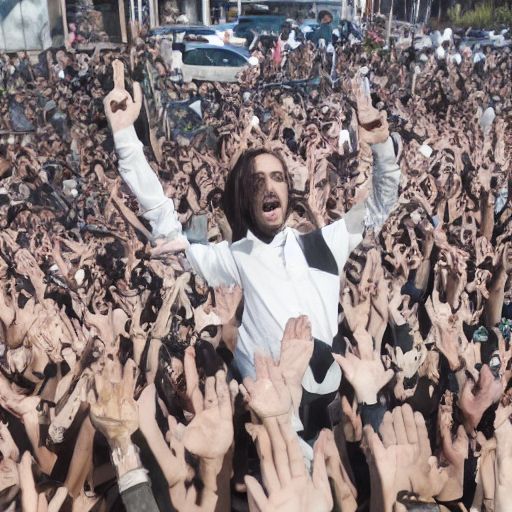

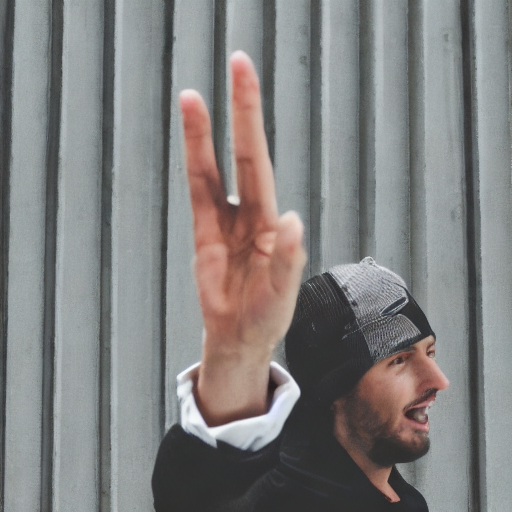

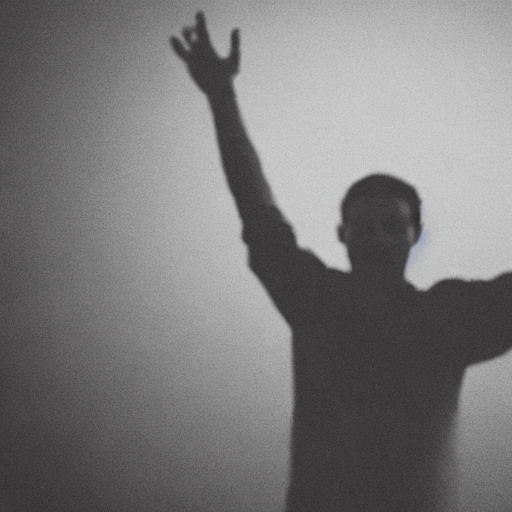

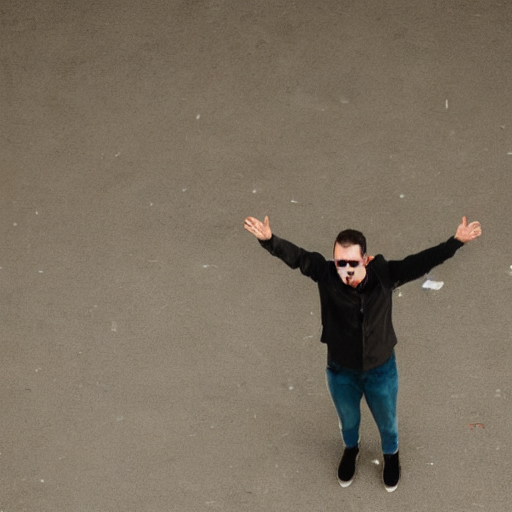

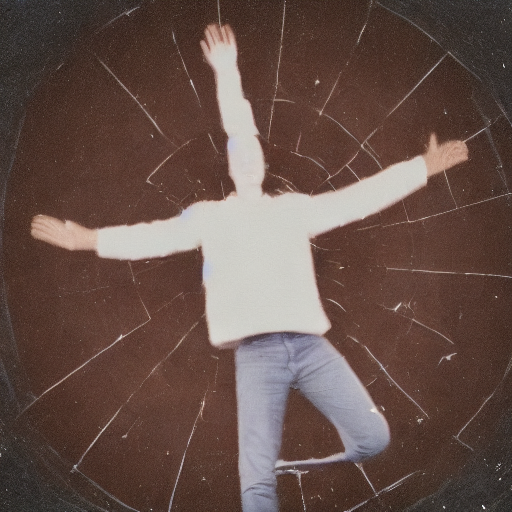

In [ ]:
#@title Run for generating images.

alpha = 0.9 #@param {type:"number"}
num_samples = 5 #@param {type:"number"}
guidance_scale = 3 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}

edit_embeddings = alpha*target_embeddings + (1-alpha)*optimized_embeddings

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        text_embeddings=edit_embeddings,
        height=height,
        width=width,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)

In [ ]:
#@markdown Run Gradio UI for generating images.
import gradio as gr

def inference(alpha, num_samples, height=512, width=512, num_inference_steps=50, guidance_scale=7.5):
    with torch.autocast("cuda"), torch.inference_mode():
        edit_embeddings = alpha*target_embeddings + (1-alpha)*optimized_embeddings
        return pipe(
                text_embeddings=edit_embeddings, height=int(height), width=int(width),
                num_images_per_prompt=int(num_samples),
                num_inference_steps=int(num_inference_steps), guidance_scale=guidance_scale,
                generator=g_cuda
            ).images

with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            alpha = gr.Number(label="Prompt", value=0.9)
            run = gr.Button(value="Generate")
            with gr.Row():
                num_samples = gr.Number(label="Number of Samples", value=4)
                guidance_scale = gr.Number(label="Guidance Scale", value=3)
            with gr.Row():
                height = gr.Number(label="Height", value=512)
                width = gr.Number(label="Width", value=512)
            num_inference_steps = gr.Slider(label="Steps", value=50)
        with gr.Column():
            gallery = gr.Gallery()

    run.click(inference, inputs=[alpha, num_samples, height, width, num_inference_steps, guidance_scale], outputs=gallery)

demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Using Embedded Colab Mode (NEW). If you have issues, please use share=True and file an issue at https://github.com/gradio-app/gradio/
Note: opening the browser inspector may crash Embedded Colab Mode.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f2598306dd0>, 'http://127.0.0.1:7860/', None)